In [1]:
import pandas as pd

df = pd.read_csv("c:/data/wine/wine_new.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2600\791030318.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [2]:
df["class"].value_counts()

class
1    855
0    744
Name: count, dtype: int64

In [3]:
train_cols = df.columns[0:11]
X = df[train_cols]
y = df["class"]

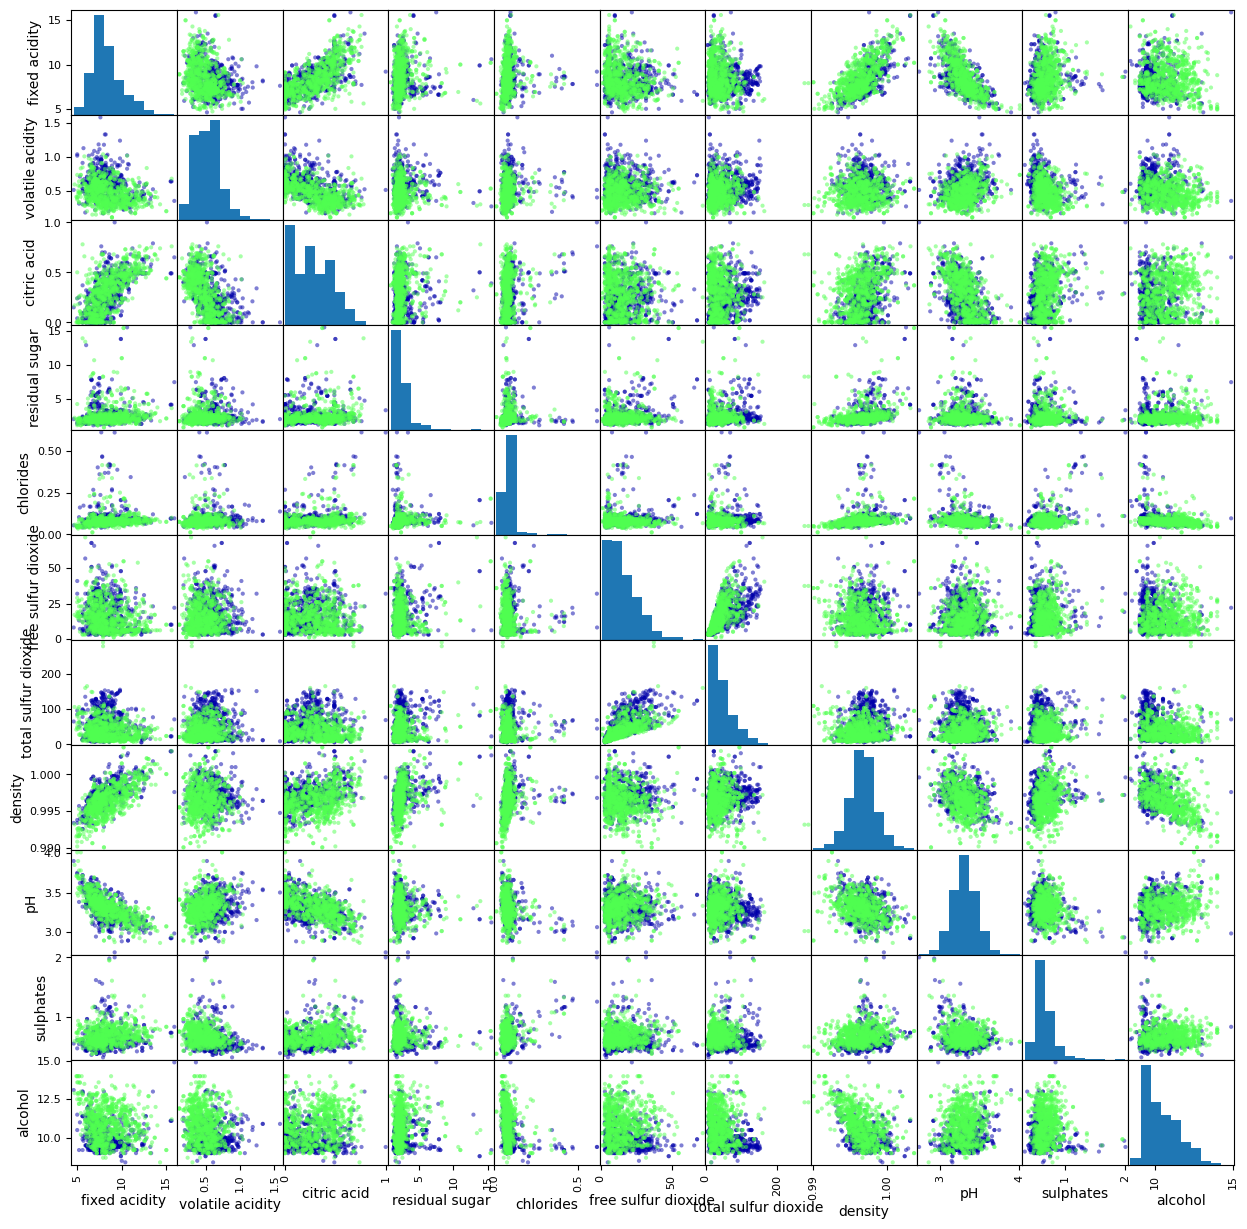

In [4]:
import mglearn
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker=".", cmap=mglearn.cm3)
plt.show()

In [5]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["class"])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2["class"].value_counts()

class
0    744
1    744
Name: count, dtype: int64

In [6]:
X = X_samp[train_cols]
y = y_samp["class"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [8]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [9]:
import numpy as np

pred = model.predict(X_test)
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))
print("검증용: ", np.mean(pred == y_test))

학습용:  0.7445378151260504
검증용:  0.7449664429530202
검증용:  0.7449664429530202


In [10]:
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)

# 값에서 평균을 빼고 표준 편차로 나누면 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [11]:
# 표준화된 데이터로 다시 훈련
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)

# 결과 : 최대 반복 횟수에 도달했다는 경고 → max_iter 반복횟수를 늘려야 함

c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [12]:
print("학습용:", model.score(X_train_scaled, y_train))
print("검증용:", model.score(X_test_scaled, y_test))

# 결과 : 예측률이 향상됨

학습용: 0.8134453781512605
검증용: 0.7986577181208053


In [13]:
# 최대 반복 횟수 max_iter를 늘림
model = MLPClassifier(max_iter=3000, random_state=42)
model.fit(X_train_scaled, y_train)

print("학습용 : ", model.score(X_train_scaled, y_train))
print("검증용 : ", model.score(X_test_scaled, y_test))
# 결과 : 예측률이 향상됨

학습용 :  0.9932773109243698
검증용 :  0.825503355704698


In [14]:
# 은닉층을 2개로 늘림
model = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100, 100], random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용 : ", model.score(X_train_scaled, y_train))
print("검증용 : ", model.score(X_test_scaled, y_test))
# 결과 : 예측률이 향상됨

학습용 :  0.9991596638655462
검증용 :  0.8187919463087249


In [15]:
# 은닉층을 3개로 늘림
odel = MLPClassifier(max_iter=1000, hidden_layer_sizes=[100, 100, 100], random_state=0)
model.fit(X_train_scaled, y_train)

print("학습용 : ", model.score(X_train_scaled, y_train))
print("검증용 : ", model.score(X_test_scaled, y_test))
# 결과 : 더이상 개선되지 않음

학습용 :  0.9991596638655462
검증용 :  0.8187919463087249


In [16]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[123,  24],
       [ 30, 121]], dtype=int64)

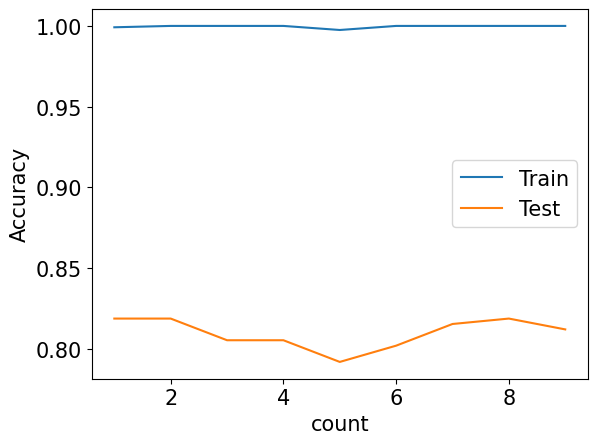

In [17]:
# 최적의 은닉노드 개수를 구하기 위한 실험
import numpy as np
import matplotlib.pyplot as plt

train_rate = []
test_rate = []

for i in range(100, 301, 100):  # 첫번째 은닉층의 노드수 100~300
    for j in range(100, 301, 100):  # 두번째 은닉층의 노드수 100~300
        model = MLPClassifier(random_state=0, hidden_layer_sizes=[i, j], max_iter=1000)
        model.fit(X_train_scaled, y_train)
        train_rate.append(model.score(X_train_scaled, y_train))
        test_rate.append(model.score(X_test_scaled, y_test))

plt.rcParams["font.size"] = 15
plt.plot(range(1, 10), train_rate, label="Train")
plt.plot(range(1, 10), test_rate, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("count")
plt.legend()

In [18]:
test_rate

[0.8187919463087249,
 0.8187919463087249,
 0.8053691275167785,
 0.8053691275167785,
 0.7919463087248322,
 0.802013422818792,
 0.8154362416107382,
 0.8187919463087249,
 0.8120805369127517]

In [19]:
max_rate = max(test_rate)

In [20]:
np.argmax(test_rate)

0

In [21]:
max_rate = max(test_rate)  # 최댓값
idx = np.argmax(test_rate)
print("idx : ", idx)
print("최고정확도 : ", max_rate)
cnt = 0
for i in range(100, 301, 100):
    for j in range(100, 301, 100):
        if cnt == idx:
            print(i, j)
        cnt += 1

idx :  0
최고정확도 :  0.8187919463087249
100 100


In [22]:
# 실험을 통해 구한 최적의 은닉노드수로 만든 모형

model = MLPClassifier(hidden_layer_sizes=[300, 100], random_state=0)
model.fit(X_train_scaled, y_train)
print(f"학습용 :{model.score(X_train_scaled, y_train)*100:6.2f}%")
print(f"검증용 :{model.score(X_test_scaled, y_test)*100:6.2f}%")

학습용 : 99.58%
검증용 : 84.23%


c:\python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
print(f"학습용 :{model.score(X_train_scaled, y_train)*100}%")
print(f"검증용 :{model.score(X_test_scaled, y_test)*100:.2f}%")

학습용 :99.57983193277312%
검증용 :84.23%
